In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate

In [13]:
data = pd.read_csv('../Dataset Creation/synthetic_heart_attack_data_balanced.csv')

In [14]:
# Display dataset overview
print("Dataset Overview:")
print(tabulate(data.head(), headers="keys", tablefmt="pretty"))

Dataset Overview:
+---+-------------------+-------------------+-------------------+-----------------------+--------------------+-----------------+---------------+------------+-------------------+
|   |     HR (BPM)      |     SpO2 (%)      |     PRV (ms)      | Skin Temperature (°C) |      GSR (µS)      | MAX30102 Status | TMP117 Status | GSR Status | Heart Attack Risk |
+---+-------------------+-------------------+-------------------+-----------------------+--------------------+-----------------+---------------+------------+-------------------+
| 0 | 89.96542061441045 | 94.41213905964185 | 43.24144931326353 |   37.68546489483266   | 22.577637412021737 |     Online      |    Online     |   Online   |        Yes        |
| 1 | 96.33353285170102 | 93.88176060584811 | 82.38255554785746 |  35.920036168460506   | 7.426972811290103  |     Online      |    Online     |   Online   |        No         |
| 2 | 63.66328293306537 | 99.17313575462242 | 48.20911785513768 |   38.35071206146241   | 5.

In [15]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HR (BPM)               50000 non-null  float64
 1   SpO2 (%)               50000 non-null  float64
 2   PRV (ms)               50000 non-null  float64
 3   Skin Temperature (°C)  50000 non-null  float64
 4   GSR (µS)               50000 non-null  float64
 5   MAX30102 Status        50000 non-null  object 
 6   TMP117 Status          50000 non-null  object 
 7   GSR Status             50000 non-null  object 
 8   Heart Attack Risk      50000 non-null  object 
dtypes: float64(5), object(4)
memory usage: 3.4+ MB
None


In [16]:
# Display summary statistics
print("\nSummary Statistics:")
summary_stats = data.describe()
print(tabulate(summary_stats, headers="keys", tablefmt="pretty"))


Summary Statistics:
+-------+--------------------+--------------------+--------------------+-----------------------+--------------------+
|       |      HR (BPM)      |      SpO2 (%)      |      PRV (ms)      | Skin Temperature (°C) |      GSR (µS)      |
+-------+--------------------+--------------------+--------------------+-----------------------+--------------------+
| count |      50000.0       |      50000.0       |      50000.0       |        50000.0        |      50000.0       |
| mean  | 86.08871668814089  |  93.7702492699102  | 57.88852448009476  |   37.48389852803498   | 11.634053737036027 |
|  std  | 10.818520406304037 | 2.6091892287038703 | 17.722959750827133 |  0.8210446975765626   | 6.713336268765141  |
|  min  | 60.00187479166426  | 90.00005136982318  | 40.00041293603693  |  35.500025296633915   | 2.0004551296537043 |
|  25%  | 79.48716839629728  | 91.67116633479682  | 44.373703306992205 |   36.96086951076434   | 5.9247662223185396 |
|  50%  | 88.99018109477743  |  93.

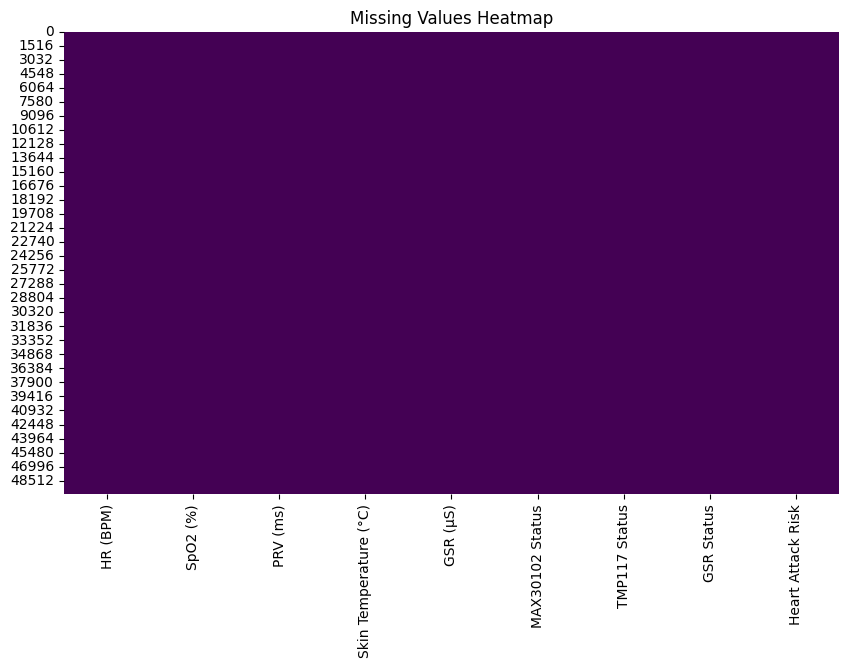

In [17]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [18]:
print("\nDuplicate Rows:", data.duplicated().sum())
data = data.drop_duplicates()


Duplicate Rows: 0


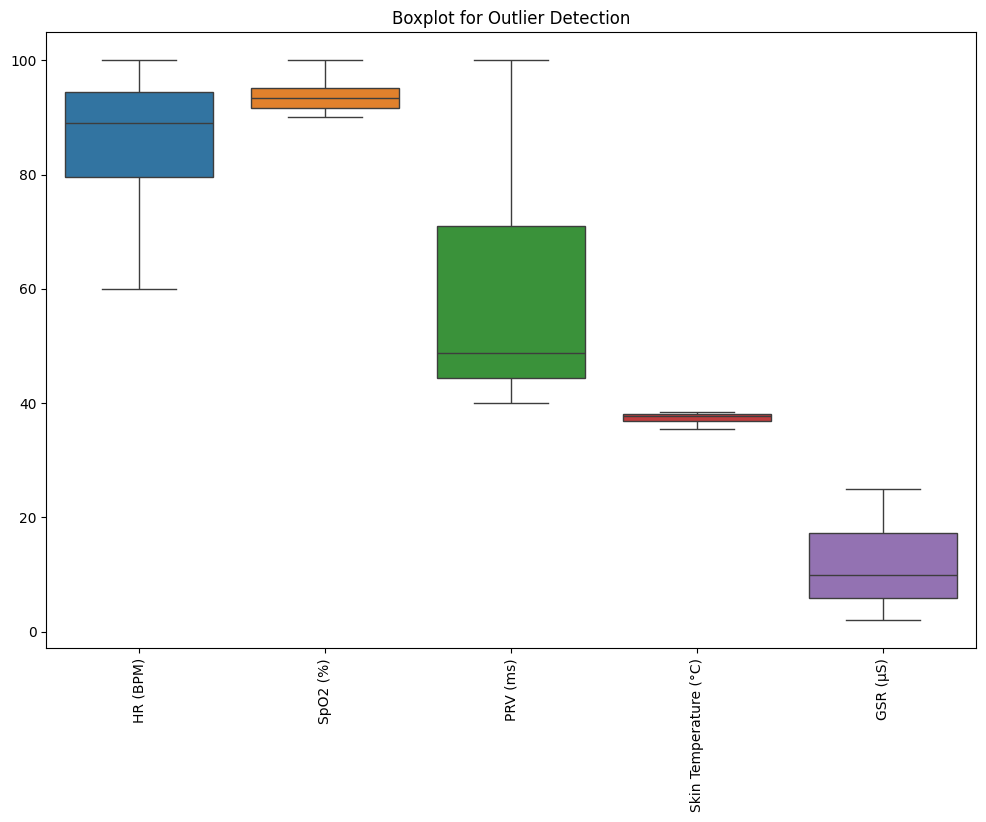

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data)
plt.title("Boxplot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

In [20]:
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

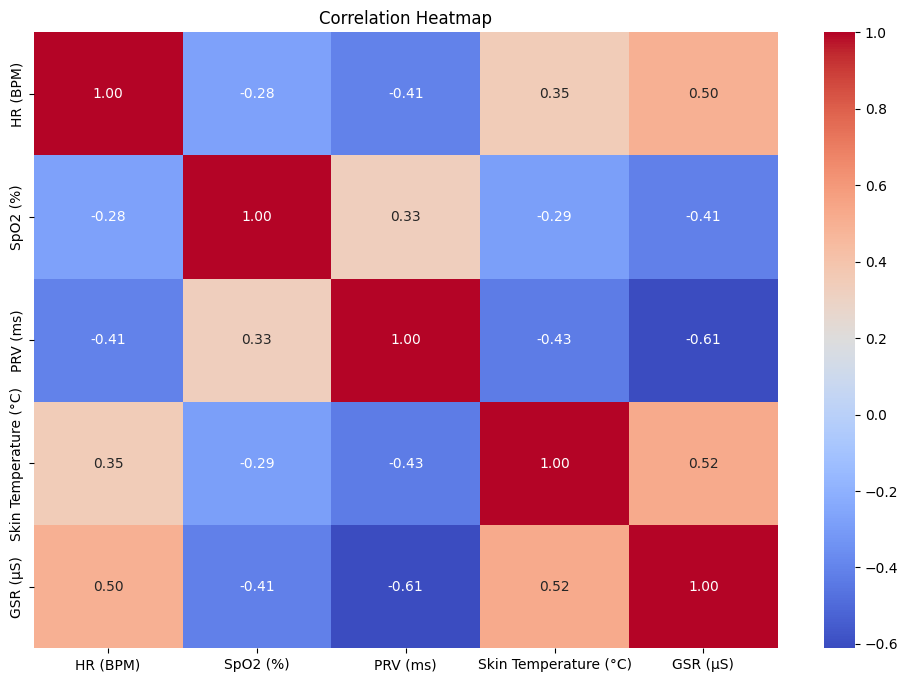

In [21]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Check if there are enough numeric columns
if numeric_data.shape[1] >= 2:
    # Compute correlation and plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Not enough numeric data for correlation heatmap.")